In [12]:
import os 
from glob import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import dates as mdates
import datetime as dt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt

## Import Data from folder

## Index 0: 60Minute  
## Index 1: Day

In [2]:
csvlist = []
day_list =[]

final_data={}
select_tf=["day","60minute"]
for filename in tqdm(glob('stock_data/*')):
    names =(filename.split(os.sep)[-1].split('_'))
#     csvlist.append('_'.join(names[0:2]))
#     if 'day' in names:
#         day_list.append('_'.join(names[0:2]))
    company_name=names[0]
    if company_name not in final_data.keys():
        final_data[company_name]=[]
    if names[1] in select_tf :
        data=pd.read_csv(filename, index_col=0)
        final_data[company_name].append(data)

100%|███████████████████████████████████████████████████████████████████████████████| 808/808 [00:02<00:00, 277.61it/s]


In [14]:
day_list

['ACC_day',
 'ADANIENT_day',
 'ADANIGREEN_day',
 'ADANIPORTS_day',
 'AMBUJACEM_day',
 'APOLLOHOSP_day',
 'ASIANPAINT_day',
 'AUROPHARMA_day',
 'AXISBANK_day',
 'BAJAJ-AUTO_day',
 'BAJAJFINSV_day',
 'BAJAJHLDNG_day',
 'BAJFINANCE_day',
 'BANDHANBNK_day',
 'BANKBARODA_day',
 'BERGEPAINT_day',
 'BHARTIARTL_day',
 'BIOCON_day',
 'BOSCHLTD_day',
 'BPCL_day',
 'BRITANNIA_day',
 'CHOLAFIN_day',
 'CIPLA_day',
 'COALINDIA_day',
 'COLPAL_day',
 'DABUR_day',
 'DIVISLAB_day',
 'DLF_day',
 'DMART_day',
 'DRREDDY_day',
 'EICHERMOT_day',
 'GAIL_day',
 'GLAND_day',
 'GODREJCP_day',
 'GRASIM_day',
 'HAVELLS_day',
 'HCLTECH_day',
 'HDFCAMC_day',
 'HDFCBANK_day',
 'HDFCLIFE_day',
 'HDFC_day',
 'HEROMOTOCO_day',
 'HINDALCO_day',
 'HINDPETRO_day',
 'HINDUNILVR_day',
 'ICICIBANK_day',
 'ICICIGI_day',
 'ICICIPRULI_day',
 'IGL_day',
 'INDIGO_day',
 'INDUSINDBK_day',
 'INDUSTOWER_day',
 'INFY_day',
 'IOC_day',
 'ITC_day',
 'JINDALSTEL_day',
 'JSWSTEEL_day',
 'JUBLFOOD_day',
 'KOTAKBANK_day',
 'LICI_day',
 'LTI

In [21]:
for i in day_list:
    globals()[f'{i}'] = pd.read_csv(filename)

In [29]:
final_data

{'ACC': [      Unnamed: 0                       date    close     high      low  \
  0              0  2015-01-01 00:00:00+05:30  1403.55  1411.00  1397.95   
  1              1  2015-01-02 00:00:00+05:30  1425.90  1431.00  1405.55   
  2              2  2015-01-05 00:00:00+05:30  1433.65  1439.75  1423.75   
  3              3  2015-01-06 00:00:00+05:30  1383.55  1428.95  1370.55   
  4              4  2015-01-07 00:00:00+05:30  1367.45  1384.95  1336.20   
  ...          ...                        ...      ...      ...      ...   
  1902        1902  2022-10-17 00:00:00+05:30  2270.10  2285.05  2205.30   
  1903        1903  2022-10-18 00:00:00+05:30  2219.25  2293.20  2216.00   
  1904        1904  2022-10-19 00:00:00+05:30  2246.45  2258.40  2212.55   
  1905        1905  2022-10-20 00:00:00+05:30  2287.60  2299.00  2227.95   
  1906        1906  2022-10-21 00:00:00+05:30  2256.55  2300.00  2241.05   
  
           open   volume  
  0     1400.15   101070  
  1     1406.40   153349

In [27]:
for companies in final_data:
    for tables in companies:
        tables[date] = 

AttributeError: 'DataFrame' object has no attribute 'dt'

## Section 2
### Plot Candlestick

In [21]:
dfc = final_data['ACC'][1]
dfc['VolumePositive'] = dfc['open'] < dfc['close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['date'] = pd.to_datetime(dfc['date'])
dfc['date'] = dfc['date'].apply(mdates.date2num)
dfc.head()

,index,date,close,high,low,open,volume,VolumePositive
0,0,16435.770833,1403.55,1411.00,1397.95,1400.15,101070,True
1,1,16436.770833,1425.90,1431.00,1405.55,1406.40,153349,True
2,2,16439.770833,1433.65,1439.75,1423.75,1425.00,207979,True
3,3,16440.770833,1383.55,1428.95,1370.55,1425.00,368755,False
4,4,16441.770833,1367.45,1384.95,1336.20,1382.00,301895,False


Text(0, 0.5, 'Price')

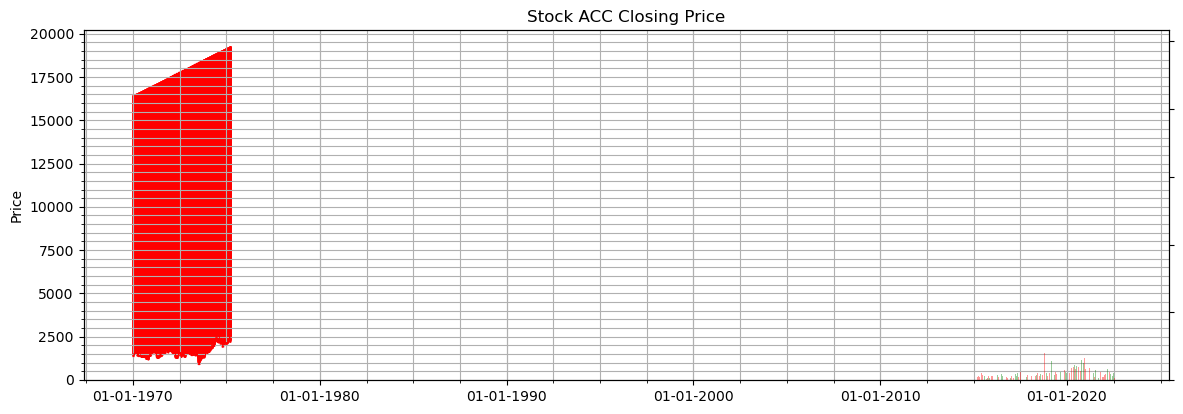

In [25]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.date, dfc['volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.volume.max())
ax.set_title('Stock '+ 'ACC' +' Closing Price')
ax.set_ylabel('Price')